In [27]:
libro = read.csv("elearning.txt", sep = "\n", fileEncoding = "UTF-8", header=F)
libro

V1
<chr>
1. Aprendizaje activo
"Se trata de una formación que requiere de mucho esfuerzo por parte del alumno, ya que no cuenta con la “presión” de tener que ir a clase. Se trata pues, de una de modalidad donde el alumno se hace a sí mismo, aprende a responsabilizarse de su formación por iniciativa propia."
2. Seguimiento exhaustivo del proceso de formación
"A pesar de lo que muchos puedan pensar, el alumno que realiza una formación online no está solo. Para ello, existen las diferentes plataformas virtuales donde puede contactar en todo momento con el tutor, al mismo tiempo que éste puede llevar un control de la actividad del alumno: participación en foros, actividad en la plataforma, cuándo se conecta, evaluación del grado de satisfacción del curso…"
3. Flexibilidad
"Esta es una de las principales ventajas del e-learning: la flexiblidad de horarios. El alumno es quien decide cuándo estudiar, cuándo descargar el programa…"
4. Acceso 24 horas
"precisamente esta ventaja está muy relacionada con la anterior. El alumno sólo necesita tener conexión a internet para poder acceder al contenido del curso, contactar con los tutores o hacer los exámenes."
"5. Sin desplazamientos, ni barreras geográficas"


In [18]:
if (!require('gutenbergr')) install.packages('gutenbergr'); library('gutenbergr')
if (!require('tidytext')) install.packages('tidytext'); library('tidytext')
if (!require('dplyr')) install.packages('dplyr'); library('dplyr')
if (!require('igraph')) install.packages('igraph'); library('igraph')

Loading required package: gutenbergr

Loading required package: tidytext

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [31]:
palabras = libro %>% unnest_tokens(word, V1, "words")
head(palabras)

,word
,<chr>
1,1
1.1,aprendizaje
1.2,activo
2,se
2.1,trata
2.2,de


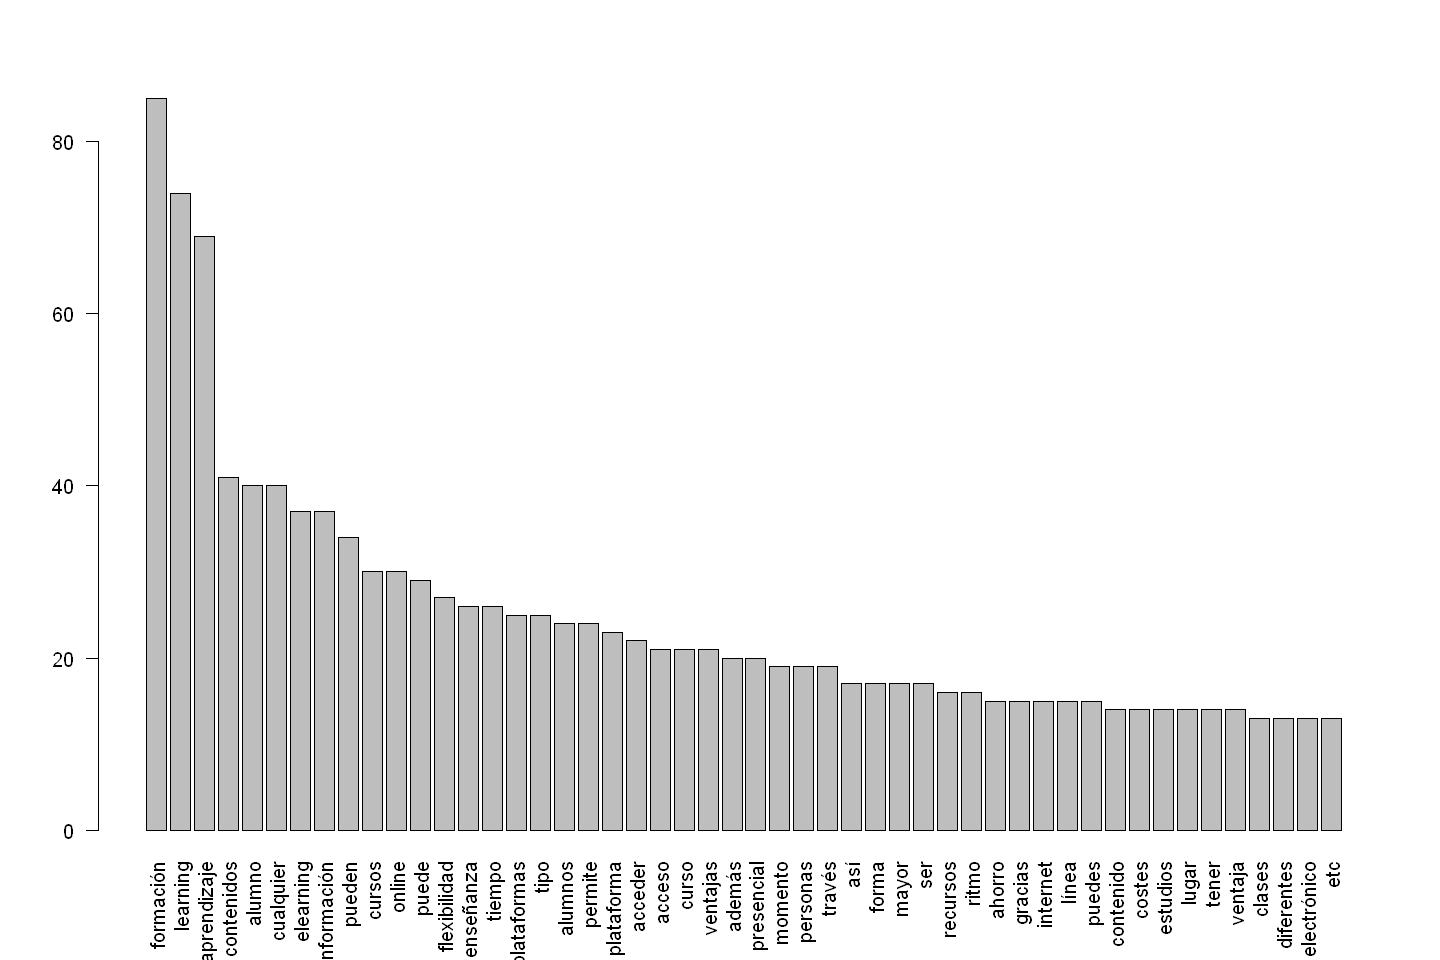

In [41]:
t_palabras = table(palabras)
df_palabras = as.data.frame(t_palabras)
s_palabras = df_palabras[order(-df_palabras$Freq), ]
sw_palabras = s_palabras[!(s_palabras$palabras %in% sw), ]
options(repr.plot.width=12, repr.plot.height=8)
barplot(sw_palabras$Freq[1:50], names = sw_palabras$palabras[1:50],las=2)

In [97]:
sw2 = c(sw, 'plataforma', 'alumnos', 'alumno', 'contenidos', 'información', 'aprendizaje', 'formación', 'elearning', 'learning', 'cualquier', 'online', 'pueden', 'puede', 'permite', 'ventajas', 'así', 'ser', 'gracias', 'puedes', 'tener', 'etc', 'ventaja', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'tal', 'sino', 'través', 'si', 'hacen', 'además', 'just', 'in', 'sólo', 'ello', 'cada', 'cuando', 'pues', 'solo', 'según', 'cabo', 'cuándo')

In [98]:
sw_palabras = s_palabras[!(s_palabras$palabras %in% sw2), ]
options(repr.plot.width=12, repr.plot.height=8)
#barplot(sw_palabras$Freq[1:50], names = sw_palabras$palabras[1:50],las=2)

In [99]:
if (!require('wordcloud')) install.packages('wordcloud'); library('wordcloud')
png('learning.png', width=640, height=640)
wordcloud(words = sw_palabras$palabras, freq = sw_palabras$Freq, min.freq = 1, max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
dev.off()

png 
  2

In [32]:
if (!require('stopwords')) install.packages('stopwords'); library('stopwords')

Loading required package: stopwords



In [49]:
sw = stopwords::stopwords("es")
sw_palabras = s_palabras[!(s_palabras$word %in% sw), ]
head(sw_palabras, 20)
options(repr.plot.width=12, repr.plot.height=8)
barplot(sw_palabras$Freq[1:50], names = sw_palabras$word[1:50],las=2)

ERROR: Error: Language "sp" not found.
See `?stopwords_getlanguages` for more information on supported languages.
